# Visualization tools on Python.

This notebooks resume some of the most commons visualization tools on Python

***
## Pandas
***

**Pandas** visualizes and manipulates data tables. There are many functions that allow efficient manipulation for the preliminary steps of data analysis problems. Run the code below to read in the TCLab data file as a DataFrame data. **The data.head()** command shows the top rows of the table.

In [13]:
import pandas as pd
data = pd.read_csv('TCLab_ss1.txt')
print(data.head())

          Q1         Q2     T1     T2
0  46.458549  65.722695  34.01  31.21
1  52.920782  31.783877  40.30  31.11
2  30.273413  14.655389  36.85  29.34
3  97.817672  50.730076  49.23  31.28
4  94.648879  91.025338  50.48  35.14


The **data.describe()** command shows summary statistics.

In [14]:
print(data.describe())

               Q1          Q2          T1          T2
count  120.000000  120.000000  120.000000  120.000000
mean    47.889806   50.990620   39.455833   33.456500
std     26.697499   29.894677    6.911408    3.598129
min      3.103358    0.333330   26.860000   24.510000
25%     24.454193   28.370305   34.185000   31.020000
50%     43.829722   52.226625   37.400000   33.545000
75%     73.543570   79.391947   44.842500   35.845000
max     98.912891   99.991342   53.870000   42.650000


The **data.plot()** creates a plot with all of the data columns.

<AxesSubplot:>

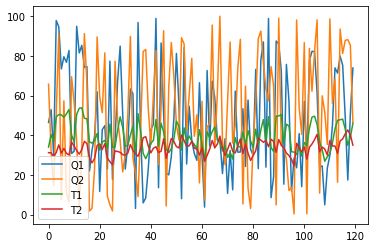

In [15]:
data.plot()

The optional parameter `kind` is the type of plot to produce.

* **line** : line plot (default)
* **bar** : vertical bar plot
* **barh** : horizontal bar plot
* **hist** : histogram
* **box** : boxplot
* **kde / density** : Kernel Density Estimation plot
* **area** : area plot
* **pie** : pie plot
* **scatter** : scatter plot
* **hexbin** : hexbin plot

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

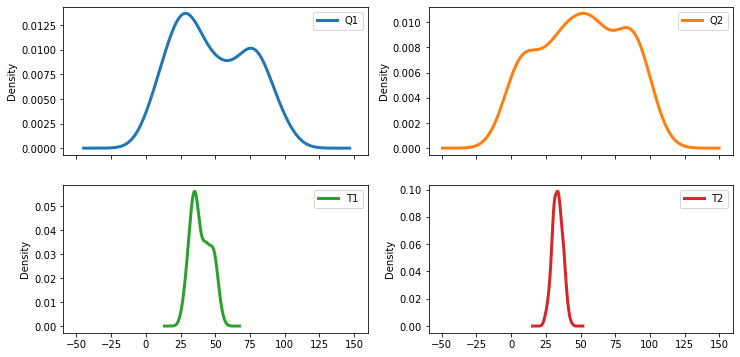

In [16]:
data.plot(kind='density', lw=3, subplots=True,layout=(2,2),figsize=(12,6))

Q1       AxesSubplot(0.125,0.125;0.168478x0.755)
Q2    AxesSubplot(0.327174,0.125;0.168478x0.755)
T1    AxesSubplot(0.529348,0.125;0.168478x0.755)
T2    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

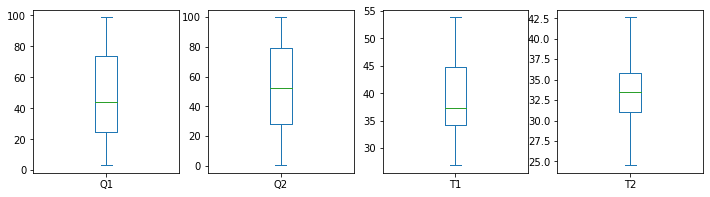

In [17]:
data.plot(kind='box', subplots=True, figsize=(12,3))

**Pandas Profiling** generates more detailed analysis than the pandas describe function. It produces an overview of data with only a couple lines of code. Use *minimial=True* to avoid running the correlation plots that take a long time with large data sets. Run the code to generate the profile of the data and view either as a Notebook widget or as an html file. Explore the data to determine the relationships between the variables.

In [18]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(data, explorative=True, minimal=False)
#try:
#   profile.to_widgets()         # view as widget in Notebook
#except:
#   profile.to_file('data.html') # save as html file

***
## Matplotlib
***

Probably one of the most used and this package generates plots in Python. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


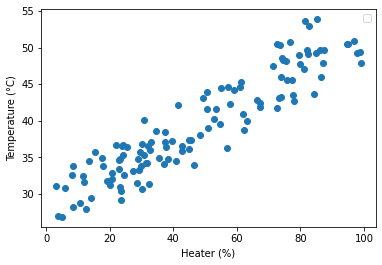

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data['Q1'],data['T1'])

# add labels and title
plt.xlabel('Heater (%)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

***
## Plotty
***

Packages such as **plotly** and **bokeh** render interactive plots with HTML and JavaScript. Plotly Express is a high-level and easy-to-use interface to Plotly.

In [20]:
import plotly.express as px
fig = px.scatter(data, x="Q1", y="T1")
fig.show()

***
## Seaborn
***

**Seaborn** is built on `matplotlib`, and produces detailed plots in few lines of code. Run the code below to see an example with the TCLab data.

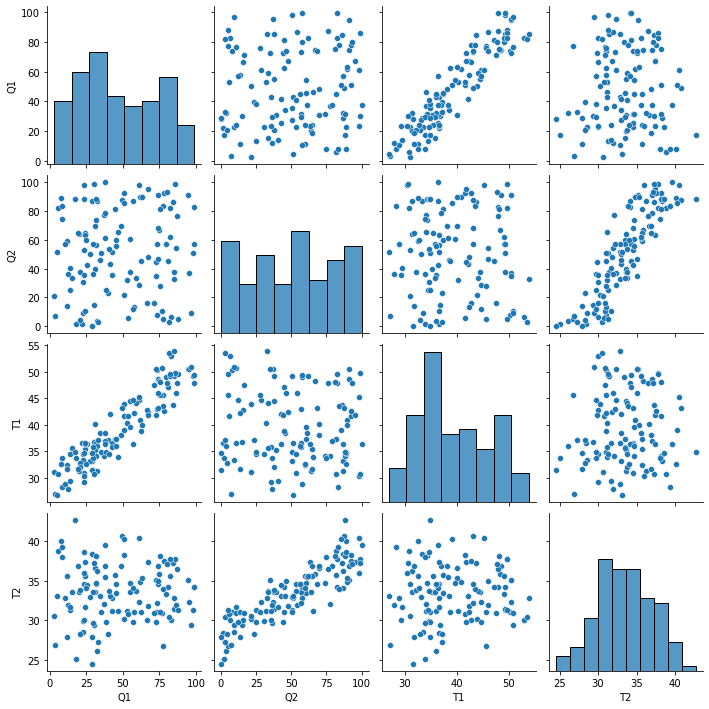

In [21]:
import seaborn as sns
sns.pairplot(data)

<AxesSubplot:>

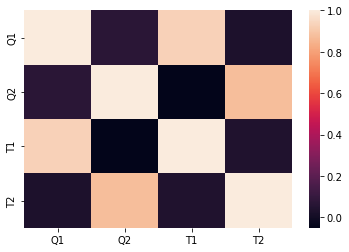

In [22]:
import seaborn as sns
sns.heatmap(data.corr())

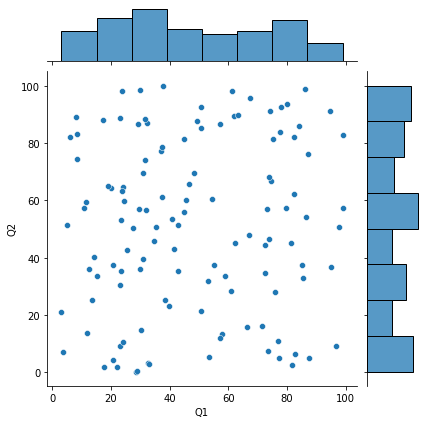

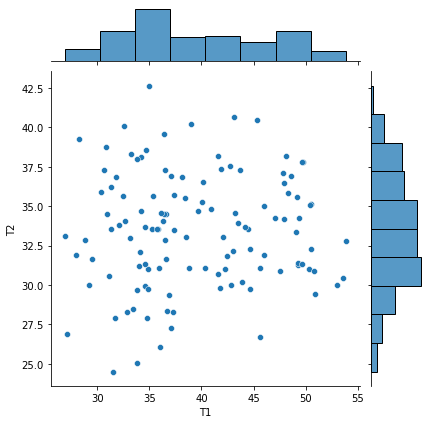

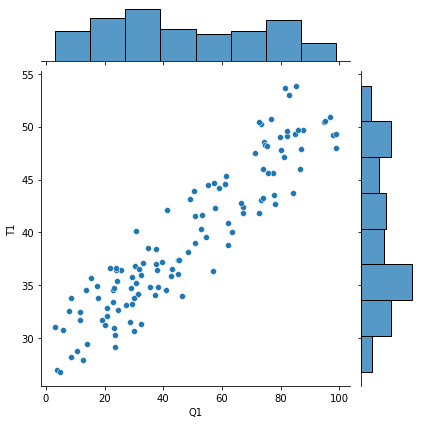

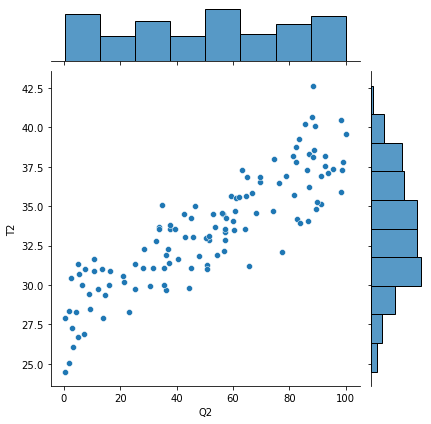

In [23]:
sns.jointplot(x=data.Q1, y=data.Q2)
sns.jointplot(x=data.T1, y=data.T2)
sns.jointplot(x=data.Q1, y=data.T1)
sns.jointplot(x=data.Q2, y=data.T2)

***
## Altair
***

**Atair** is a declarative statistical visualization library for Python 

In [24]:
import altair as alt


In [31]:
alt.Chart(data).mark_point().encode(
    x='Q1',
    y='T1',
)

alt.Chart(...)

In [35]:
brush = alt.selection(type='interval')

points = alt.Chart(data).mark_point().encode(
    x='Q1',
    y='T1',
    color=alt.condition(brush, 'Q1', alt.value('lightgray'))
).add_selection(
    brush
)

points

alt.Chart(...)